In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  

In [2]:
df = pd.read_csv('../data/data.csv')

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


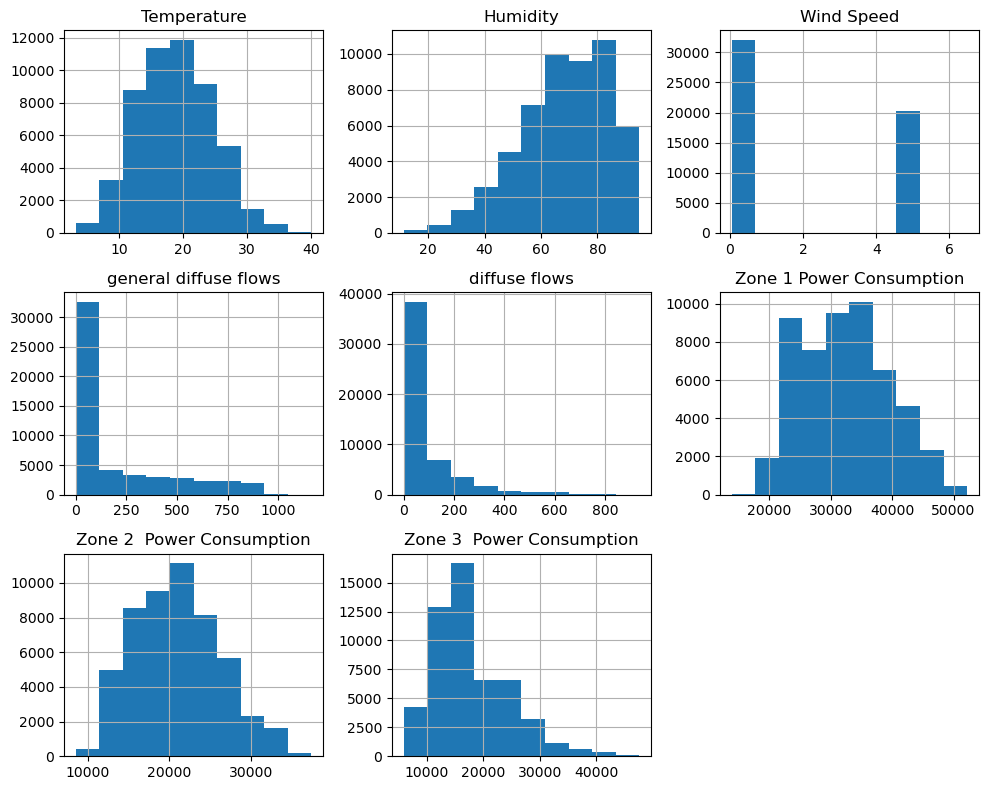

In [21]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


- wind speed is weird
- diffuse flows and general diff flows are skewed

In [22]:
df['Total Power Consumption'] = df["Zone 1 Power Consumption"] + df["Zone 2  Power Consumption"] + df["Zone 3  Power Consumption"]

/tmp/ipykernel_2905/30999886.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


<Axes: >

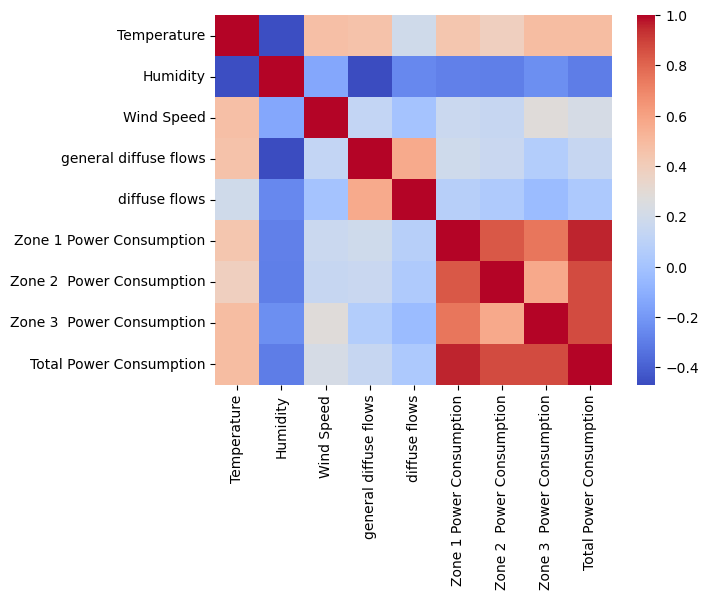

In [23]:
# Plot the covariance matrix
sns.heatmap(df.corr(), cmap='coolwarm')


In [24]:
correlation = df['general diffuse flows'].corr(df['diffuse flows'])
print(correlation)

0.5647175499736116


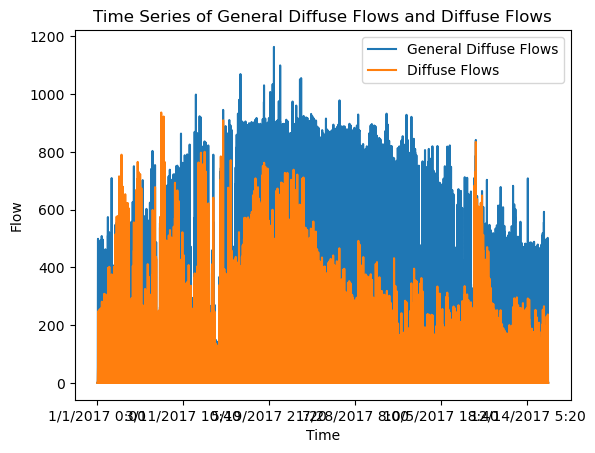

In [26]:
df.plot(x='DateTime', y=['general diffuse flows', 'diffuse flows'], kind='line')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Time Series of General Diffuse Flows and Diffuse Flows')
plt.legend(['General Diffuse Flows', 'Diffuse Flows'])
plt.show()


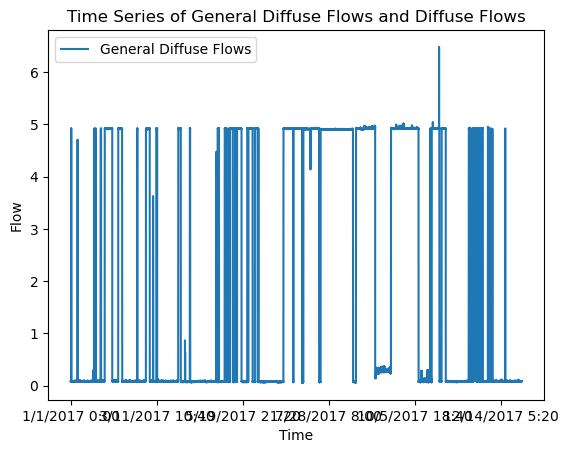

In [27]:
df.plot(x='DateTime', y='Wind Speed', kind='line')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Time Series of General Diffuse Flows and Diffuse Flows')
plt.legend(['General Diffuse Flows', 'Diffuse Flows'])
plt.show()

- unclear pattern
- week correlation with the target features (we can see that they are uncorrelated)

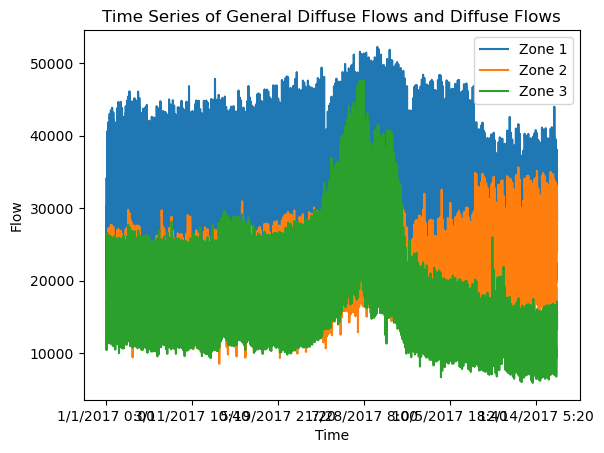

In [30]:
df.plot(x='DateTime', y=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], kind='line')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Time Series of General Diffuse Flows and Diffuse Flows')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3'])
plt.show()

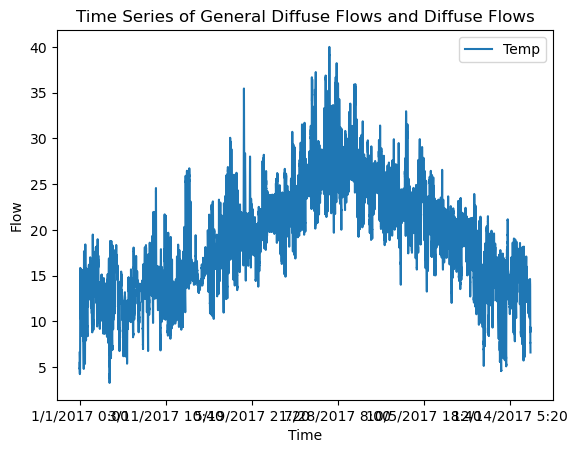

In [32]:
df.plot(x='DateTime', y='Temperature', kind='line')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Time Series of General Diffuse Flows and Diffuse Flows')
plt.legend(['Temp'])
plt.show()

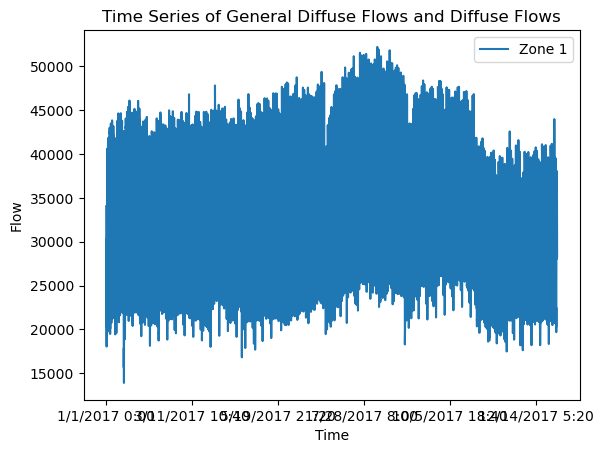

In [35]:
df.plot(x='DateTime', y='Zone 1 Power Consumption', kind='line')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Time Series of General Diffuse Flows and Diffuse Flows')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3'])
plt.show()

- peak in zone 3, variance is not stable
- zone 1 maybe the city center (the majority of the power consumption is there)
- zone 2 and zone 3 in the last days are close